<a href="https://colab.research.google.com/github/raapassos/DataScience/blob/main/Aplica%C3%A7%C3%A3o_KMeans_MallCustomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm

Base de dados retirada do kaggle

In [ ]:
base_vendas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

In [ ]:
base_vendas.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243829 sha256=0d374abc5d232e6b3b65fff76742b190c10efa67d9f7db0bd517e2a4ac8b0762
  Stored in directory: /tmp/pip-ephem-wheel-cache-lwmxy6u6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(base_vendas, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
profile

In [ ]:
profile.to_file(output_file='KMeans_Mall_Customers.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

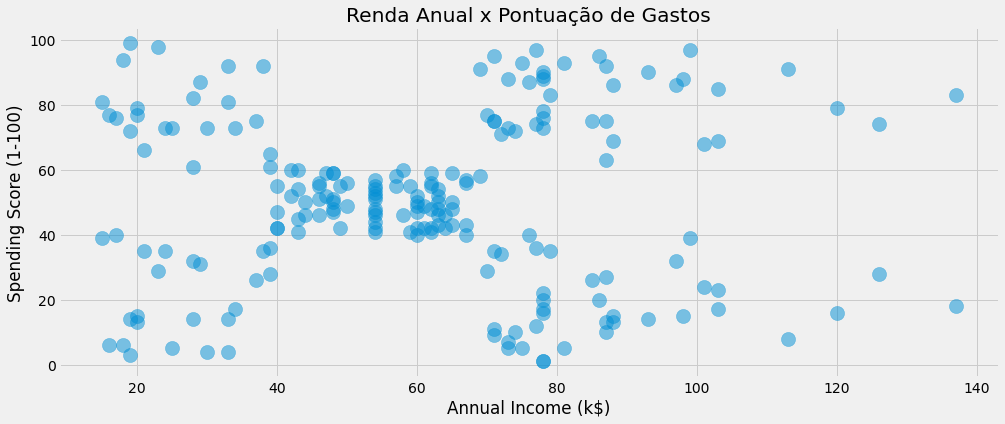

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data= base_vendas, s=200, alpha=0.5)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)')
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

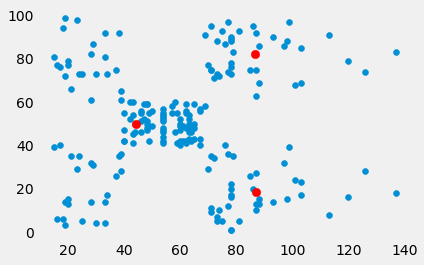

In [ ]:
X2 = base_vendas[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

"Método da Curva do Cotovelo" - WCSS(Within Cluster Sum of Squares) - Serve para descobrir qual o número ideal de clusters para a base de dados.

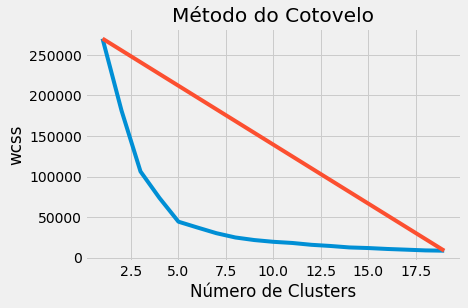

In [ ]:
wcss = []
for i in range (1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('wcss')
plt.show()

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [25.72727273 79.36363636]]
44448.45544793371


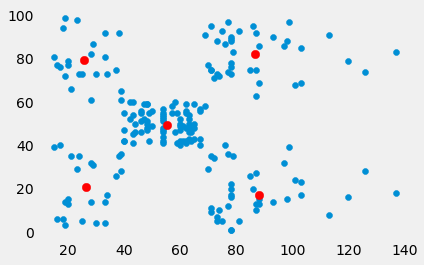

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

plt.scatter(X2[:,0], X2[:,1])
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()


A partir daqui podemos separar esses grupos para tomarmos decisões específicas de marketing, vendas, etc. 